<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/VoiceClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']
bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

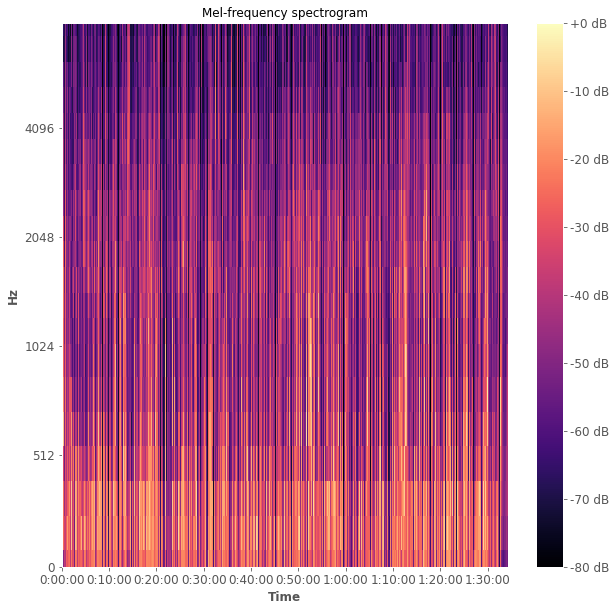

In [90]:
y,sr = librosa.load('us_election_2020_2nd_presidential_debate.mp3')
dur_time = librosa.get_duration(y,sr=sr)
time_sec = round(dur_time)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20, fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')
#plt.xlim(60,120)

In [115]:
start = 0 
end = time_sec 
time_series_sec = np.linspace(start,end,len(S_dB[0]))

In [180]:
print(end)

5655


In [116]:
data = pd.read_csv('us_election_2020_2nd_presidential_debate.csv')

In [117]:
def convert_to_sec(time_string):
    time_s_list = time_string.split(':')
    if len(time_s_list)>2:
        date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    else:
        date_time = datetime.datetime.strptime(time_string, "%M:%S")
        a_timedelta = date_time - datetime.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return seconds

In [118]:
minute_list = data.minute.tolist()

In [119]:
SEC_LIST = []
for t in minute_list:
    try:
        SEC_LIST.append(convert_to_sec(t))
    except:
        SEC_LIST.append(0)
for k in range(2):
    for i in range(len(SEC_LIST)-1):
        if SEC_LIST[i]==SEC_LIST[i+1]:
            SEC_LIST[i+1]=SEC_LIST[i]+1
turn_index = SEC_LIST.index(0)
to_add = SEC_LIST[turn_index-1]
for j in range(turn_index,len(SEC_LIST)):
    SEC_LIST[j]=SEC_LIST[j]+to_add
data['Seconds']=SEC_LIST

In [120]:
data.head()

speaker  ... Seconds
0  Kristen Welker  ...    18.0
1    Donald Trump  ...   457.0
2  Kristen Welker  ...   478.0
3  Kristen Welker  ...   507.0
4  Kristen Welker  ...   543.0

[5 rows x 4 columns]

In [121]:
new_data = data[data.Seconds<=time_series_sec.max()]
new_data.speaker = new_data.speaker.replace({'Chris Wallace:':'Chris Wallace'})

In [122]:
max_sec = new_data.Seconds.max()

In [181]:
print(max_sec)

4296.0


In [123]:
new_data.drop_duplicates(subset='speaker')

speaker  ... Seconds
0  Kristen Welker  ...    18.0
1    Donald Trump  ...   457.0
9       Joe Biden  ...   673.0

[3 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


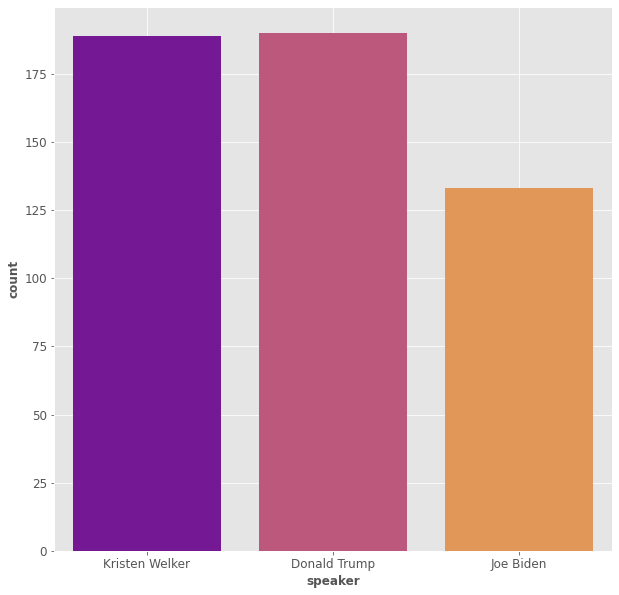

In [124]:
sns.countplot(new_data.speaker,palette='plasma')
plt.grid(True)

In [125]:
audio_data = pd.DataFrame(S_dB)

In [126]:
audio_data = audio_data.T

In [127]:
audio_data.tail()

0          1          2   ...         17         18         19
243538 -50.453934 -40.787918 -39.191971  ... -64.985657 -66.246437 -66.499191
243539 -50.749237 -42.532188 -37.070969  ... -64.704491 -65.974609 -66.054436
243540 -51.553604 -43.259056 -35.484772  ... -64.175865 -64.787270 -66.013977
243541 -51.454353 -44.486412 -37.335392  ... -64.061478 -65.889717 -66.976349
243542 -53.498451 -47.660706 -40.400269  ... -67.178879 -69.232346 -69.847336

[5 rows x 20 columns]

In [128]:
import numpy as np
from sklearn.decomposition import PCA

In [129]:
pca = PCA(n_components=4)
pca.fit(audio_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [130]:
pca_data = pd.DataFrame(pca.transform(audio_data))

Text(0, 0.5, 'Second component')

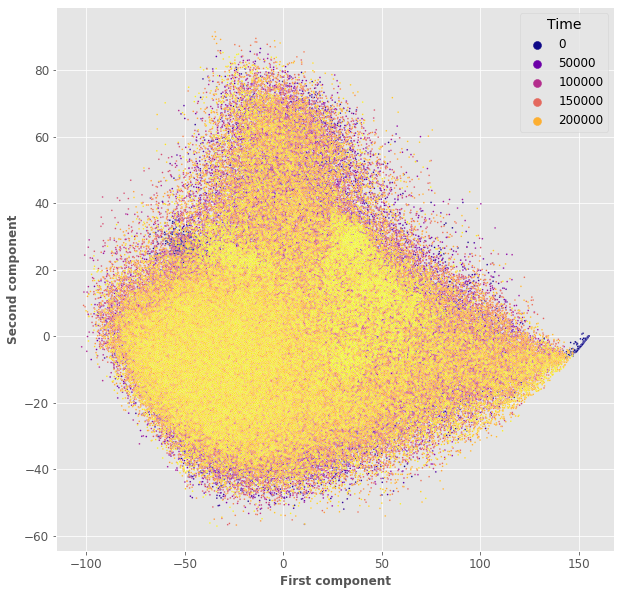

In [131]:
plt.grid(True)
sns.scatterplot(x=pca_data[0],y=pca_data[1],hue=pca_data.index,s=3,palette='plasma')
plt.legend(title='Time')
plt.xlabel('First component')
plt.ylabel('Second component')

In [132]:
audio_time = np.array(pca_data.index.tolist())*max_sec/np.array(pca_data.index.tolist()).max()
pca_data['Time']=audio_time
pca_data.head()

0         1          2         3      Time
0  155.145676  0.131518  25.000761  4.375364  0.000000
1  155.145676  0.131518  25.000761  4.375364  0.017640
2  154.998901  0.013141  24.682104  4.393736  0.035279
3  154.737640 -0.172208  24.198339  4.396963  0.052919
4  155.031204  0.047397  24.779219  4.380171  0.070559

In [133]:
nd_time_list = [0]+new_data.Seconds.tolist()
CLASS = []
for j in range(len(audio_time)):
    time_j = audio_time[j]
    for i in range(1,len(nd_time_list)):
        start_i = nd_time_list[i-1]
        end_i = nd_time_list[i]
        if time_j>start_i and time_j<end_i:
            CLASS.append(new_data.loc[i-1].speaker)

In [134]:
pca_data['speaker']=CLASS[0:len(pca_data)]

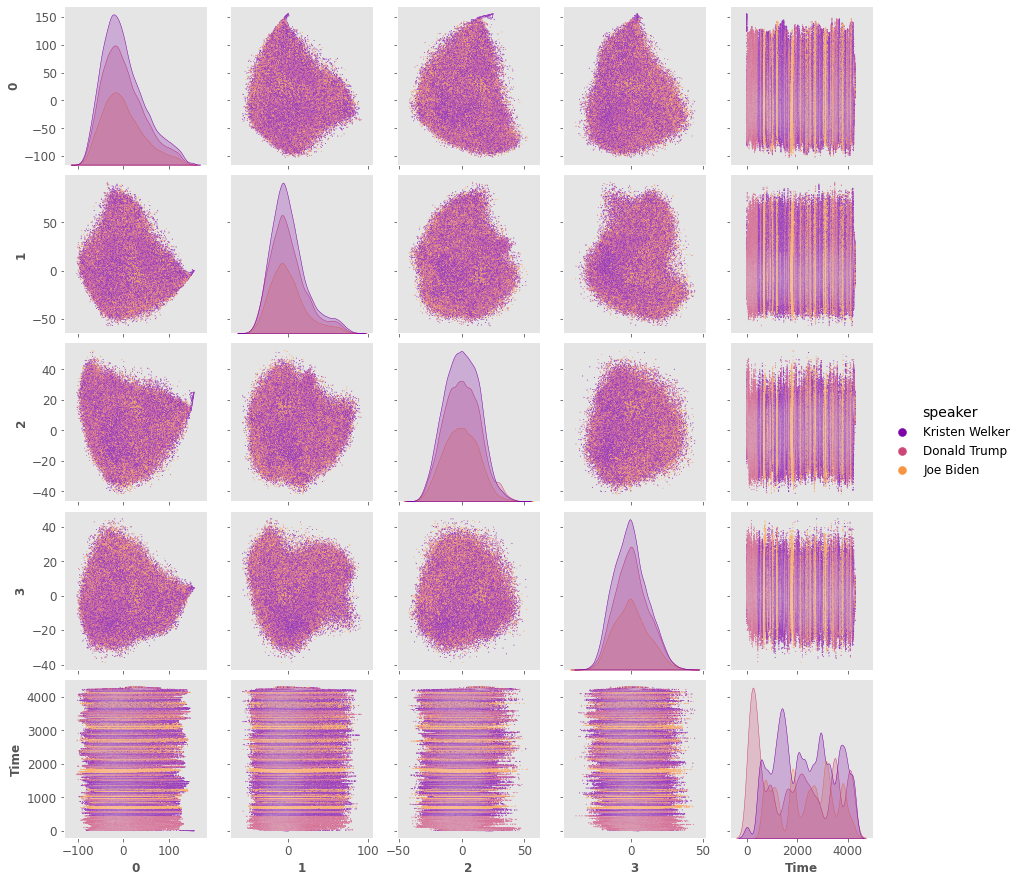

In [135]:
#plt.grid(True)
sns.pairplot(pca_data,hue='speaker',plot_kws={'s':1},palette='plasma')

In [136]:
from sklearn.feature_selection import mutual_info_classif as mi

In [137]:
mi(X=pca_data[['Time',0,1,2,3]],y=pca_data['speaker'])

array([7.20314257e-01, 1.60289840e-03, 4.58824191e-04, 8.49696617e-04,
       7.76961944e-05])

In [139]:
time_series_data = pca_data[['Time',2,'speaker']]

In [140]:
time_series_data = time_series_data.rename(columns={2:'X'})

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


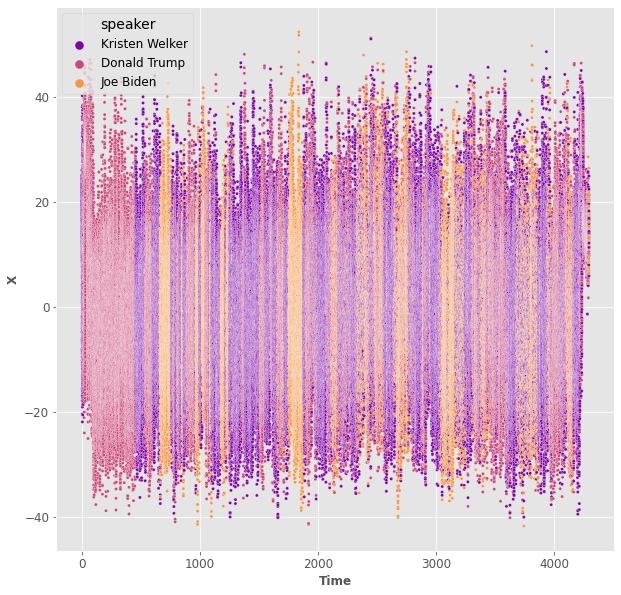

In [141]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [142]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [143]:
time_series_data['speaker']=le.fit_transform(time_series_data.speaker)

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


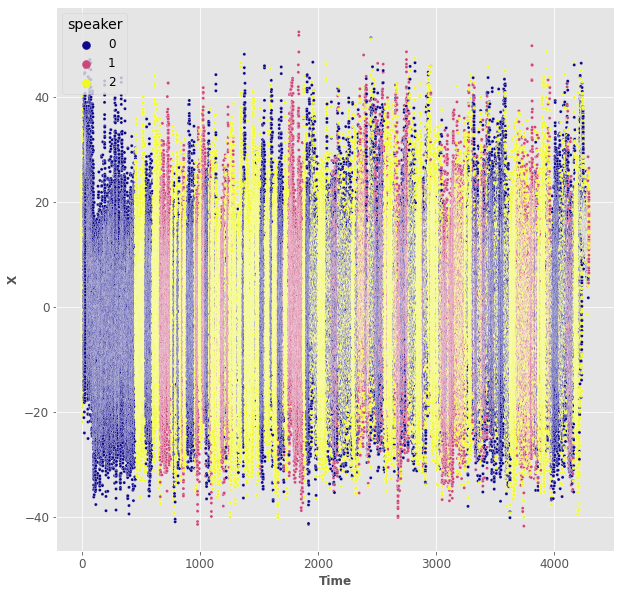

In [144]:
sns.scatterplot(x='Time',y='X',hue='speaker',data=time_series_data,s=10,palette='plasma')
plt.grid(True)

In [145]:
encod_dic = {0:'Kristen Welker',2:'Vice President Joe Biden',1:'President Donald J. Trump'}

In [146]:
X=time_series_data[['Time','X']]
y=time_series_data.speaker

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)


In [195]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [196]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [197]:
num_classes = len(np.unique(y_train))


In [198]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [199]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [65]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
#keras.utils.plot_model(model, show_shapes=True)


In [66]:
epochs = 30
batch_size = 50

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/30
993/993 [==============================] - 5s 4ms/step - loss: 0.9484 - sparse_categorical_accuracy: 0.5222 - val_loss: 0.9041 - val_sparse_categorical_accuracy: 0.5392
Epoch 2/30
993/993 [==============================] - 4s 4ms/step - loss: 0.9090 - sparse_categorical_accuracy: 0.5447 - val_loss: 0.8531 - val_sparse_categorical_accuracy: 0.6123
Epoch 3/30
993/993 [==============================] - 4s 4ms/step - loss: 0.8965 - sparse_categorical_accuracy: 0.5545 - val_loss: 0.8607 - val_sparse_categorical_accuracy: 0.6343
Epoch 4/30
993/993 [==============================] - 4s 4ms/step - loss: 0.8909 - sparse_categorical_accuracy: 0.5573 - val_loss: 0.8885 - val_sparse_categorical_accuracy: 0.5836
Epoch 5/30
993/993 [==============================] - 4s 4ms/step - loss: 0.8808 - sparse_categorical_accuracy: 0.5627 - val_loss: 0.8293 - val_sparse_categorical_accuracy: 0.6338
Epoch 6/30
993/993 [==============================] - 4s 4ms/step - loss: 0.8764 - sparse_categorica

In [200]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

3806/3806 [==============================] - 5s 1ms/step - loss: 14.0455 - sparse_categorical_accuracy: 0.2594
Test accuracy 0.25943565368652344
Test loss 14.045516967773438


In [202]:
encod_dic[0]

'Kristen Welker'

In [203]:
pred_test = pd.DataFrame(model.predict(x_test))

In [204]:
pred_test = pred_test.rename(columns={0:encod_dic[0]})

In [205]:
pred_test = pred_test.rename(columns={1:encod_dic[1]})

In [206]:
pred_test = pred_test.rename(columns={2:encod_dic[2]})

In [207]:
pred_test.head()

Kristen Welker  President Donald J. Trump  Vice President Joe Biden
0    0.000000e+00                   1.000000              2.950855e-10
1    4.768603e-38                   1.000000              9.771809e-10
2    3.098007e-01                   0.427112              2.630877e-01
3    9.736740e-36                   1.000000              5.053795e-09
4    3.535874e-01                   0.135272              5.111408e-01

In [208]:
test_data = X_test.reset_index().drop('index',axis=1)
test_data['target']=y_test
test_data['Kristen Welker']=pred_test['Kristen Welker']
test_data['President Donald J. Trump']=pred_test['President Donald J. Trump']
test_data['Vice President Joe Biden']=pred_test['Vice President Joe Biden']

In [209]:
target_list = test_data.target.tolist()
for t in range(len(target_list)):
    target_list[t]=encod_dic[target_list[t]]

In [210]:
test_data['target']=target_list

In [211]:
test_data = test_data.sort_values(by='Time')

In [212]:
test_data

Time  ...  Vice President Joe Biden
81649      0.000000  ...              1.201356e-06
39090      0.070559  ...              1.217722e-06
23557      0.105838  ...              1.259490e-06
25005      0.194036  ...              1.470205e-06
9561       0.211676  ...              1.391924e-06
...             ...  ...                       ...
64485   4295.858883  ...              4.843799e-12
121006  4295.947081  ...              4.485561e-12
87776   4295.964721  ...              4.568033e-12
26797   4295.982360  ...              4.346494e-12
63733   4296.000000  ...              4.267403e-12

[121772 rows x 6 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

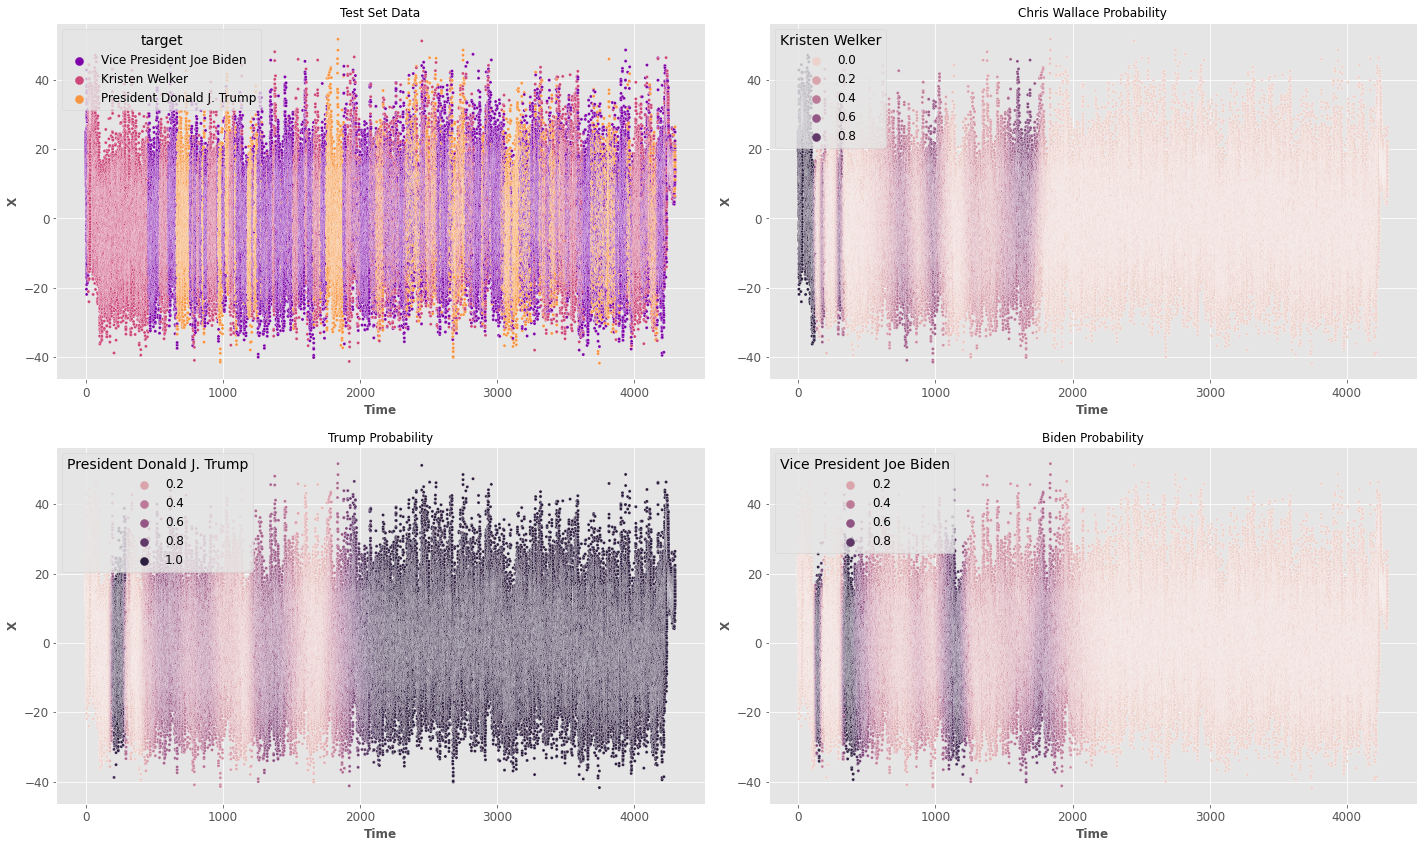

In [213]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('Test Set Data')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data.target,palette='plasma')
plt.grid(True)
plt.subplot(2,2,2)
plt.title('Chris Wallace Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['Kristen Welker'])
plt.grid(True)
plt.subplot(2,2,3)
plt.title('Trump Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['President Donald J. Trump'])
plt.grid(True)
plt.subplot(2,2,4)
plt.title('Biden Probability')
sns.scatterplot(test_data.Time,test_data.X,s=10,hue=test_data['Vice President Joe Biden'])
plt.grid(True)
plt.tight_layout()

In [214]:
def model_to_clf(input_data):
    pred_list = model.predict(input_data)
    LIST_PRED = []
    for p in pred_list:
        LIST_PRED.append(np.argmax(p))
    return LIST_PRED

In [215]:
cm=confusion_matrix(model_to_clf(x_test),y_test)

In [216]:
cm_data = pd.DataFrame(cm,columns=[encod_dic[0],encod_dic[1],encod_dic[2]])

In [217]:
cm_data.index = [encod_dic[0],encod_dic[1],encod_dic[2]]

In [218]:
cm_data

Kristen Welker  ...  Vice President Joe Biden
Kristen Welker                       7979  ...                      5210
President Donald J. Trump           28669  ...                     42890
Vice President Joe Biden             6302  ...                      5325

[3 rows x 3 columns]

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

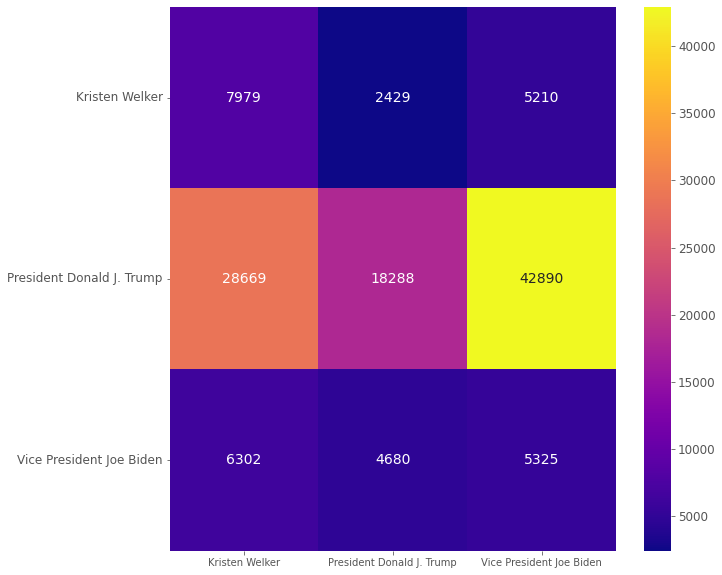

In [219]:
sns.heatmap(cm_data.astype(int), fmt='d', annot=True,cmap='plasma')
plt.yticks(rotation=0)
plt.xticks(rotation=0,fontsize=10)

In [220]:
clf_report = classification_report(y_test,
                                   model_to_clf(x_test),
                                   labels= [0,1,2],
                                   target_names= [encod_dic[0],encod_dic[1],encod_dic[2]],
                                   output_dict=True)

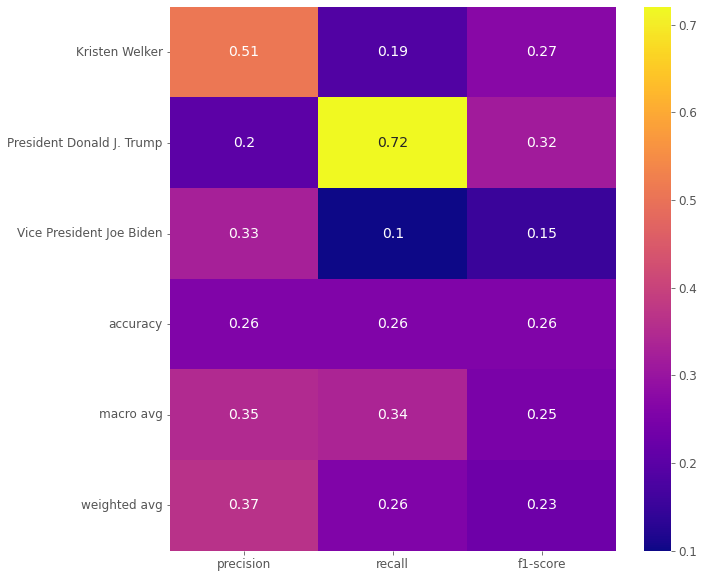

In [221]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='plasma')


In [222]:
!pip install jovian

In [223]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
